# Unsupervised Learning

Given dataset is of bank data which is unlabeled, our aim is to identify the pattern, customer belonging classes.

---

### Goal:
Here are the tasks I will perform:
 1. Doing some primary Analysis for several categorical feature reveal
 2. Performing EDA like missing values analysis, outlier treatment if needed, dealing with correalated variables
 3. Perform dimensionality reduction using PCA such that 95% of the variance is explained
 4. Find optimum value of k for k-means clustering by elbow method and plot the elbow curve
 5. Finally will build K-Means cluster model using the optimum value of K.

---

#### Importing Required Libraries for basic operations

1. **pandas:** With the help of pandas library operation of dataframe become easy, we can see all statistical parameters and also helps to perform many dataframe operations like rename column, concatinate, information of columns type, we can check for null values also, convert categorical to numerical, and many more.

2. **numpy:** numpy is used for basic array operations.

3. **Matplotlib & Seaborn:** Throughout the work I need visual representation of some columns, here matplotlib and seaborn will help to show graphical presentation of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

So we have 8950 Rows(entries) 18 columns(dimensions)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


**1. Primary analysis shows there are credit card details for 8950 people and the data has some missing values too. All vlaues are numeric so no need to convert categorical values to numbers. the details shared have to information about purchase history and the patterns**

**2. Basic Exploratory Data Analysis**

In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Column **MINIMUM_PAYMENTS** has 313 null values and **CREDIT_LIMIT** has 1 null value.

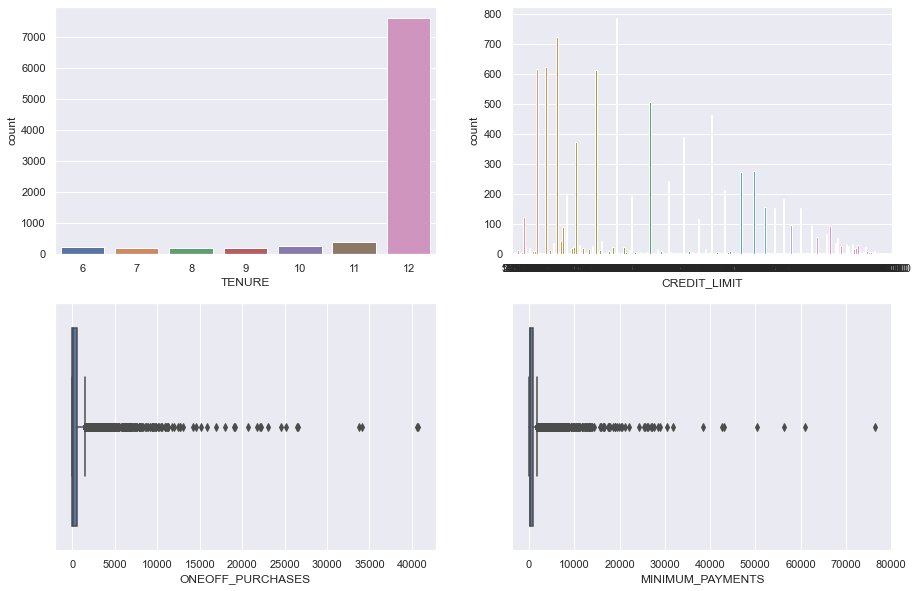

In [7]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.countplot(df.TENURE, ax=ax1);

sns.countplot(df.CREDIT_LIMIT, ax=ax2);

sns.boxplot(df.ONEOFF_PURCHASES, ax=ax3);

sns.boxplot(df.MINIMUM_PAYMENTS, ax=ax4);

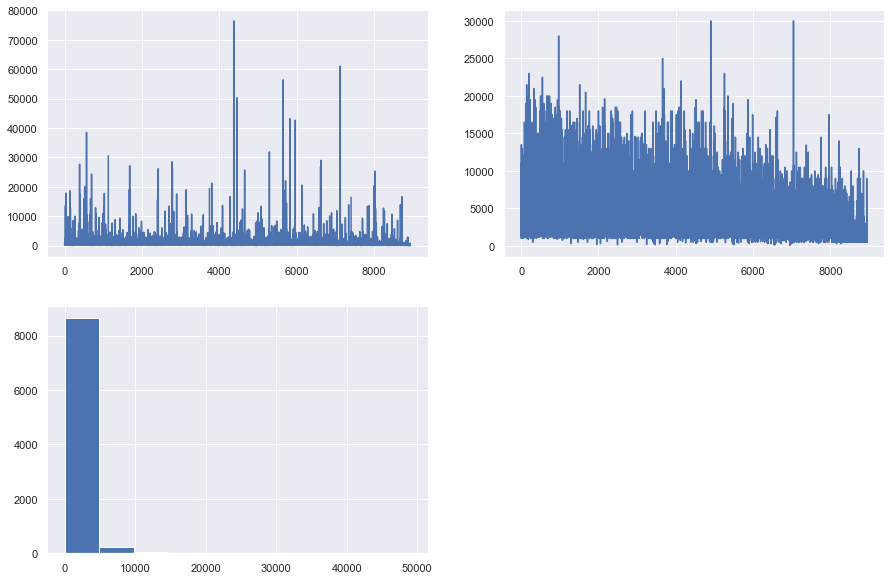

In [8]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.plot(df.MINIMUM_PAYMENTS);

ax2.plot(df.CREDIT_LIMIT);

ax3.hist(df.PURCHASES);

Graph 1: As we can see in the MINIMUM_PAYMENT plot there is too much diverge in it and we want to fill our missing values with median, outliers has to be removed before imputing the missing values in minimum payments.

#### Using Z-Score to remove the outlier

In [9]:
#removing outliers from minimum payments before imputing the missing values

outup=df.MINIMUM_PAYMENTS.mean() + 3* df.MINIMUM_PAYMENTS.std()
outlow=df.MINIMUM_PAYMENTS.mean() - 3* df.MINIMUM_PAYMENTS.std()
print(outup)
print(outlow)


7981.546362057007
-6253.133277446844


In [10]:
df.loc[df['MINIMUM_PAYMENTS']>=7981,'MINIMUM_PAYMENTS']=7981

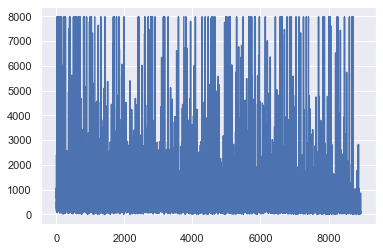

In [11]:
plt.plot(df.MINIMUM_PAYMENTS);

In [12]:
#imputing the missing vlaues
df.MINIMUM_PAYMENTS=df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median())
df.CREDIT_LIMIT=df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median())

In [13]:
#removing the identifiers
df.drop(['CUST_ID'],axis=1,inplace=True)

In [14]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Correlation Variables

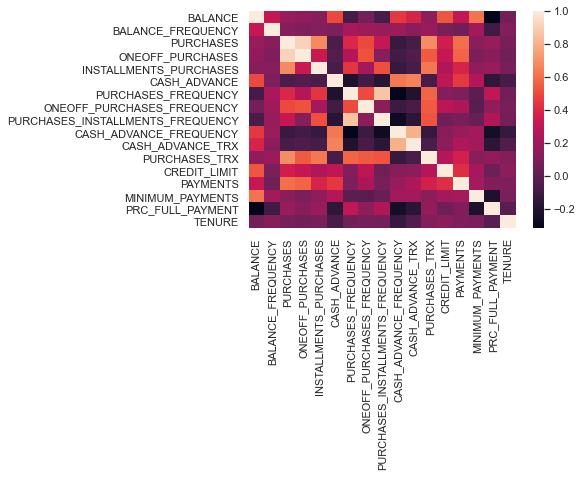

In [15]:
corr=df.corr()
sns.heatmap(corr);

Above graph is the representation of correlation between columns, how each columns is correlated to other and we can see there is showing complete correlation diagonally which is nothing but represent X correlated to X. Apart from this the darker the area between columns the lesser they are corelated and the lighter the color the higher in correlation.

Let's see the exact probability values of correlation in below cell.

In [16]:
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.613521,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.214902,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.137947,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.090655,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.159450,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.263801,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.000424,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.013907,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.031740,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.215515,-0.249773,-0.133372


#### Feature Scaling
Feature Scaling is help us to scale our values. Now question here is why do we need to scale our data? Let's look at our dataframe columns some columns have values in probability which is between 0 and 1 and some are having values in 10s, 100s, 1000s and so on, if we train our model with this unscaled data there is bias towards higher values and prediction become less accurate while our aim is to reduce error and model should predict higher accuracy. To avoiding this biasness we should scale our data

**NOTE:** We always scale our data when we are using distance based algorith whereas in tree based algorithm we can skip scaling.

In [17]:
x = df.copy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [18]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.505147,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.279053,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.095090,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.359851,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.416641,-0.525551,0.36068


Here we go
Our dataset is scaled, now we can see there are 16 numbers of columns in our dataset. Higher the columns larger the computation time. Here I try to reduce it's dimention at a certain number where our 95% of variance should explain by Principal Component Analysis.

### 3. Dimensionality Reduction Using PCA

In [19]:
from sklearn.decomposition import PCA
pca=PCA(12)
X=pd.DataFrame(pca.fit_transform(x))

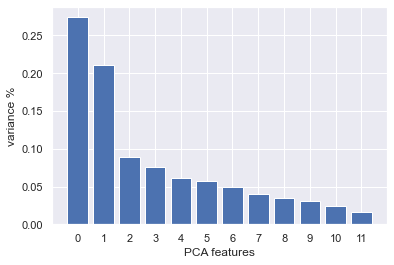

In [20]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

In [21]:
pca.explained_variance_ratio_

array([0.27404816, 0.21119269, 0.08943853, 0.07571042, 0.06105955,
       0.05673391, 0.04871615, 0.03974218, 0.03465861, 0.03071615,
       0.02365936, 0.01679936])

In [22]:
explained_variance=pca.explained_variance_ratio_

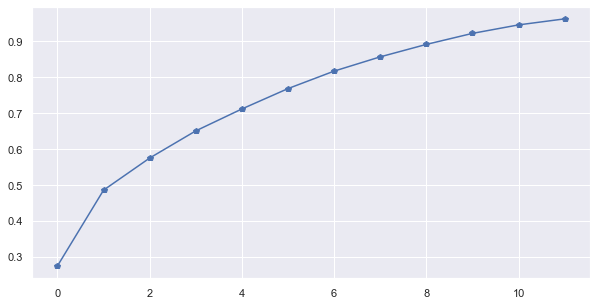

In [23]:
plt.figure(figsize=(10,5))

plt.plot(explained_variance.cumsum(),marker='p');

At 10 our 95% variance is explained and I reduced it to 12, I can reduce it to 10 but it subjective call here I am leaving as it is.

Now our data is ready to clustering.

### 4. K-Means Clustering

In [25]:
# First I will go with random number of clusters (12)
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=12,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

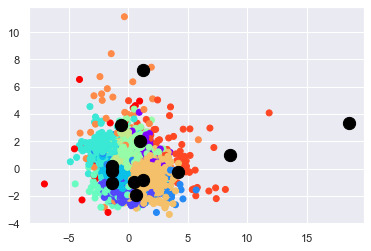

In [26]:
# Let's see how our distribution looks like by ploting
plt.scatter(X.iloc[:, 3],X.iloc[:,4],c=y_kmeans,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.show()

Above graph is showing that 12 is not clearly definig the clusters. Here we have a method called elbow method to identify the numbers of clusters or pattern in the datasets.

In [27]:
kmeans.inertia_

56142.68442622088

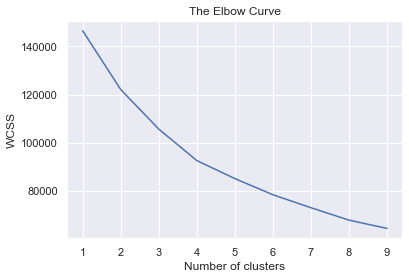

In [28]:
# Using the elbow method to find the optimal number of clusters

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

Our Elbow point is around cluster size of 4. We will use 4 for 'k' value to further interpret our clustering result.

### 6. Building K-means clustering model using the optimum value of K.

In [29]:
kmeans = KMeans(n_clusters=4)
y1=kmeans.fit(X)

In [30]:
kmeans.labels_

array([3, 2, 0, ..., 0, 3, 3], dtype=int32)

In [31]:
df['cluster_4'] = kmeans.labels_

In [32]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_4
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


Now we have labeled our dataset with 0,1,2,3 as number of cluster we choose 4, so it is devided into 4 groups and as per we labeled it.

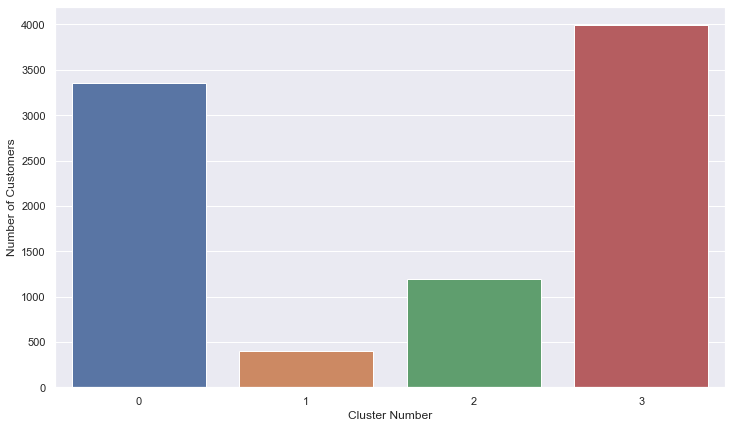

In [33]:
# Interpreting Result
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,4,1),y=df.groupby(['cluster_4']).count()['TENURE'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Customers")

**CONCLUSION**
Category 3 and 0 maximum account holder in the bank. Bank should focus on policy which is highly related to these two categories. It become easier to know about customer and further for business perspective the business holder can enhance their pilicies.